## Compare the performance of the scikit and the custom gradient boosting regressors

Tested on the scikit Diabetes toy dataset.

## Import of the dataset

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()
x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = y.iloc[:,0]

print(x.head())
print(y[:5])


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: 0, dtype: float64


## Split the dataset into training and testing sets

In [2]:
#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Comparison of the performance of the gradient boosting regressors
### 1) Compare on predefined parameters

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from algorithms.gradient_boosting import CustomGradientBoostingRegressor
from sklearn.metrics import r2_score

print("Gradient Boosting Regressor Comparison for overfit parameters")
print("------------------------------------------------------")

scikit_model = GradientBoostingRegressor(n_estimators=30, max_depth=10, random_state=42)
# Calculate average accuracy for scikit-learn forest as it changes with every fit
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn forest  |   Scikit-learn tree")
print("--------------------------------------------------")
print("Test data R2:                              ", "{:.2f}".format(scikit_score))
# Train data accuracy should be the same for every fit
scikit_train_score = scikit_model.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(scikit_train_score))
print("--------------------------------------------------")
y_pred_scikit = scikit_model.predict(x_test)

custom_model_scikit_tree = CustomGradientBoostingRegressor(n_estimators=30, max_depth=10, tree_type="scikit")
custom_model_scikit_tree.fit(x_train, y_train)
custom_score_scikit_tree = custom_model_scikit_tree.score(x_test, y_test)
print("Custom forest        |   Scikit-learn tree")
print("--------------------------------------------------")
print("Test data R2:                              ", "{:.2f}".format(custom_score_scikit_tree))
custom_train_score_scikit_tree = custom_model_scikit_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_scikit_tree))
print("--------------------------------------------------")
y_pred_custom_scikit = custom_model_scikit_tree.predict(x_test)

custom_model_custom_tree = CustomGradientBoostingRegressor(n_estimators=30, max_depth=10, tree_type="custom")
custom_model_custom_tree.fit(x_train, y_train)
custom_score_custom_tree = custom_model_custom_tree.score(x_test, y_test)
print("Custom forest        |   Custom tree")
print("--------------------------------------------------")
print("Test data R2:                              ", "{:.2f}".format(custom_score_custom_tree))
custom_train_score_custom_tree = custom_model_custom_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_custom_tree))
print("---------------------------------------------------")
y_pred_custom_custom = custom_model_custom_tree.predict(x_test)


Gradient Boosting Regressor Comparison for overfit parameters
------------------------------------------------------
Scikit-learn forest  |   Scikit-learn tree
--------------------------------------------------
Test data R2:                               0.28
Train data R2                               1.00
--------------------------------------------------
Custom forest        |   Scikit-learn tree
--------------------------------------------------
Test data R2:                               0.30
Train data R2                               1.00
--------------------------------------------------
Custom forest        |   Custom tree
--------------------------------------------------
Test data R2:                               0.29
Train data R2                               1.00
---------------------------------------------------


In [16]:
print("Forest Regressor Comparison for random parameters")
print("------------------------------------------------------")
print("max_depth=3, min_samples_split=4, min_samples_leaf=5, n_estimators=6")
print("------------------------------------------------------")

scikit_model = GradientBoostingRegressor(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, random_state=42, max_features='sqrt')
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn forest  |   Scikit-learn tree")
print("------------------------------------------------------")
print("Average test data R2:                      ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(scikit_train_score))
print("------------------------------------------------------")

custom_model_scikit_tree = CustomGradientBoostingRegressor(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, tree_type="scikit", max_features='sqrt')
custom_model_scikit_tree.fit(x_train, y_train)
custom_score_scikit_tree = custom_model_scikit_tree.score(x_test, y_test)
print("Custom forest        |   Scikit-learn tree")
print("------------------------------------------------------")
print("Average test data R2:                      ", "{:.2f}".format(custom_score_scikit_tree))
custom_train_score_scikit_tree = custom_model_scikit_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_scikit_tree))
print("------------------------------------------------------")

custom_model_custom_tree = CustomGradientBoostingRegressor(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, tree_type="custom", max_features='sqrt')
custom_model_custom_tree.fit(x_train, y_train)
custom_score_custom_tree = custom_model_custom_tree.score(x_test, y_test)

print("Custom forest        |   Custom tree")
print("------------------------------------------------------")
print("Average test data R2:                      ", "{:.2f}".format(custom_score_custom_tree))
custom_train_score_custom_tree = custom_model_custom_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_custom_tree))
print("------------------------------------------------------")


Forest Regressor Comparison for random parameters
------------------------------------------------------
max_depth=3, min_samples_split=4, min_samples_leaf=5, n_estimators=6
------------------------------------------------------
Scikit-learn forest  |   Scikit-learn tree
------------------------------------------------------
Average test data R2:                       0.29
Train data R2                               0.37
------------------------------------------------------
Custom forest        |   Scikit-learn tree
------------------------------------------------------
Average test data R2:                       0.29
Train data R2                               0.36
------------------------------------------------------
Custom forest        |   Custom tree
------------------------------------------------------
Average test data R2:                       0.29
Train data R2                               0.36
------------------------------------------------------


### 2) Compare on the best parameters obtained by hyperparameter tuning

#### Hyperparameter space

In [32]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 29, 3))
params['min_samples_split'] = list(range(2, 53, 10))
params['min_samples_leaf'] = list(range(1, 52, 10))
params['n_estimators'] = list(range(50, 401, 50))
params['max_features'] = list(range(2, 11, 2))
params['learning_rate'] = [0.01, 0.05, 0.1]
print(params)

{'max_depth': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28], 'min_samples_split': [2, 12, 22, 32, 42, 52], 'min_samples_leaf': [1, 11, 21, 31, 41, 51], 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], 'max_features': [2, 4, 6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1]}


#### Initialize Optimizer

Since the gradient boosting algorithm is not optimized and the parameter space is big, we will use hyperparameter tuning to find the best parameters only for the scikit gradient boosting regressor and then test all three models with those parameters.

In [34]:
from sklearn.model_selection import GridSearchCV

scikit_clf = GradientBoostingRegressor()
# add random state to make the results reproducible
scikit_params = params.copy()
scikit_params['random_state'] = [42]
scikit_search = GridSearchCV(scikit_clf, scikit_params, n_jobs=-1, cv=5, scoring='r2')

#### Results

In [37]:
#Scikit Learn Forest | Scikit Learn Tree
scikit_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
                         'max_features': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 11, 21, 31, 41, 51],
                         'min_samples_split': [2, 12, 22, 32, 42, 52],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400],
                         'random_state': [42]},
             scoring='r2')

In [38]:
print("Scikit Learn Forest | Scikit Learn Tree")
print("Best score", scikit_search.best_score_)
print("Best parameters", scikit_search.best_params_)

Scikit Learn Forest | Scikit Learn Tree
Best score 0.44447967608729017
Best parameters {'learning_rate': 0.1, 'max_depth': 1, 'max_features': 8, 'min_samples_leaf': 41, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}


In [49]:
from sklearn.metrics import accuracy_score

best_scikit_model = scikit_search.best_estimator_
best_scikit_model.fit(x_train, y_train)
y_pred_scikit = best_scikit_model.predict(x_test)
scikit_accuracy = r2_score(y_test, y_pred_scikit)

best_custom_scikit_model = CustomGradientBoostingRegressor(n_estimators=best_scikit_model.n_estimators, max_depth=best_scikit_model.max_depth, min_samples_split=best_scikit_model.min_samples_split, min_samples_leaf=best_scikit_model.min_samples_leaf, max_features=best_scikit_model.max_features, tree_type="scikit")
best_custom_scikit_model.fit(x_train, y_train)
y_pred_custom_scikit = best_custom_scikit_model.predict(x_test)
custom_scikit_accuracy = r2_score(y_test, y_pred_custom_scikit)

best_custom_custom_model = CustomGradientBoostingRegressor(n_estimators=best_scikit_model.n_estimators, max_depth=best_scikit_model.max_depth, min_samples_split=best_scikit_model.min_samples_split, min_samples_leaf=best_scikit_model.min_samples_leaf, max_features=best_scikit_model.max_features, tree_type="custom")
best_custom_custom_model.fit(x_train, y_train)
y_pred_custom_custom = best_custom_custom_model.predict(x_test)
custom_custom_accuracy = r2_score(y_test, y_pred_custom_custom)

print("Tree Classifier Comparison for best parameters")
print("---------------------------------------------------------")
print("Scikit Forest - Scikit Tree R2 on test data:     ", "{:.2f}".format(scikit_accuracy))
print("Custom Forest - Scikit Tree R2 on test data:     ", "{:.2f}".format(custom_scikit_accuracy))
print("Custom Forest - Custom Tree R2 on test data:     ", "{:.2f}".format(custom_custom_accuracy))



Tree Classifier Comparison for best parameters
---------------------------------------------------------
Scikit Forest - Scikit Tree R2 on test data:      0.47
Custom Forest - Scikit Tree R2 on test data:      0.47
Custom Forest - Custom Tree R2 on test data:      0.47


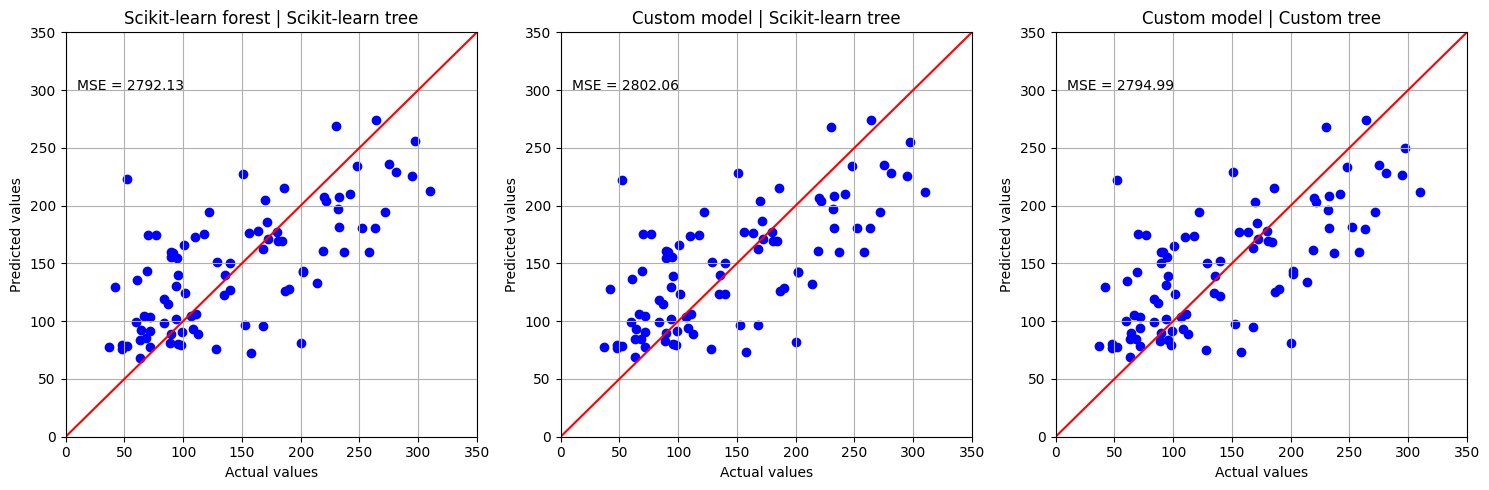

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error  

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_scikit, color='blue')
plt.title('Scikit-learn forest | Scikit-learn tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_scikit))))
plt.grid()

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_custom_scikit, color='blue')
plt.title('Custom model | Scikit-learn tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_custom_scikit))))
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_custom_custom, color='blue')
plt.title('Custom model | Custom tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_custom_custom))))
plt.grid()

plt.tight_layout()

plt.show()

